# Lab 3: Entropie warunkowe języków naturalnych

## Zadania wstępne

In [1]:
from math import log

def entropy(prob_vector, r = 2):
    return -sum(px * log(px, r) for px in prob_vector)

Entropia dla przybliżenia zerowego rzędu - wszystkie znaki mają takie samo prawdopodobieństwo:

In [2]:
from string import ascii_lowercase
from string import digits

alphabet = ascii_lowercase + digits + ' '

print(f'{entropy(1 / len(alphabet) for i in range(len(alphabet))):.2f}')

5.21


Entropia występowania znaków w języku angielskim:

In [3]:
def letterFrequency(filename, alphabet):
    file = open(filename, 'r')
    dictionary = dict.fromkeys(alphabet, 0)
    for line in file:
        for char in line:
            dictionary[char] += 1
    return dictionary

In [4]:
dictionary = letterFrequency("wiki/norm_wiki_en.txt", alphabet)
probabilities = [value / sum(dictionary.values()) for value in dictionary.values()]
print(f'{entropy(probabilities):.2f}')

4.29


## Zadanie domowe
### Rozpoznawanie czy dany tekst to język
Wylicz entropie znaków i słów oraz ich entropie warunkowe kolejnych rzędów
dla próbki języka angielskiego (plik norm_wiki_en.txt). **(2pt)**

Następnie wylicz entropie znaków i słów oraz ich entropie warunkowe kolejnych rzędów dla próbki języka łacinskiego (plik norm_wiki_lo.txt). **(2pt)**

Możesz również dokopnać analizy dla próbek innych języków:
* esperanto (plik norm_wiki_eo.txt),
* estońskiego (plik norm_wiki_et.txt),
* somalijski (plik norm_wiki_so.txt),
* haitański (plik norm_wiki_ht.txt),
* navaho (plik norm_wiki_nv.txt),

Korzystając z zaobserwowanych wartości entropii warunkowej odpowiedź
na pytanie, czy następujące pliki zawierają język naturalny: **(6pt)** (po **(1pt)** za każdy dobrze rozpoznany plik)

* sample0.txt,
* sample1.txt,
* sample2.txt,
* sample3.txt,
* sample4.txt,
* sample5.txt.

### Uwagi do zadania
* niektóre z podanych języków posiadają dodatkowe litery, które w unormowanych próbkach zostały sprowadzone do ich najbliższych odpowiedników dostępnych w alfabecie łacińskim, tak by pliki zawierały jedynie 26 małych liter alfabetu łacińskiego, cyfry i spacje,
* w celu ułatwienia sprawdzenia poprawnośći zadania entropie wyrażaj w bitach,
* podczas sprawdzania zadania będą sprawdzane wyniki, poprawnośći odpowiedzi oraz jej uzasadnienie w oparciu o otrzymane wyniki,
* zadanie może być podchwytliwe i podchwytliwych pytań można się spodziewać od prowadzących przy sprawdzaniu.

In [5]:
def load_file(filename):
    with open(filename) as file:
        return file.read()

In [6]:
# load_file('wiki/norm_wiki_en.txt')

In [7]:
def get_ngrams(text, ngram_length):
    return [tuple(text[index:index + ngram_length]) for index in range(len(text) - ngram_length)]

In [8]:
# get_ngrams(load_file('wiki/norm_wiki_en.txt'), 2)

In [9]:
from collections import Counter

def calc_entropy(tokens, ngram_len):
    ngrams = get_ngrams(tokens, ngram_len)
    ngram_counter = Counter(ngrams)
    ngram_probs = [count / len(ngrams) for count in ngram_counter.values()]
    return entropy(ngram_probs)

In [10]:
text = load_file('wiki/norm_wiki_en.txt')

# Wychodzi tak samo jak w pierwszym zad
calc_entropy(text, 1)

4.288221612546937

In [11]:
# Ze wzoru H(Y|X) = H(Y, X) - H(X)
def conditional_entropy(entropy):
    return [ent - prev_ent for ent, prev_ent in zip(entropy, [0] + entropy[:-1])]

words = text.split()

entropies = [calc_entropy(words, ngram_len) for ngram_len in range(1, 7)]
entropies

[11.543991622407374,
 17.933164298132503,
 20.109623579029073,
 20.594301542591545,
 20.70395385269892,
 20.734724130208026]

In [12]:
conditional_entropy(entropies)

[11.543991622407374,
 6.3891726757251295,
 2.1764592808965695,
 0.48467796356247206,
 0.10965231010737497,
 0.03077027750910588]

In [13]:
from tabulate import tabulate
import matplotlib.pyplot as plt

def lang_entropy(filename, entropy_ranks):
    ngram_lens = [e + 1 for e in entropy_ranks]
    text = load_file(filename)
    
    words = text.split()
    letters = list(text)
    
    # Entropia dla kolejnych ngramow
    word_entropies = [calc_entropy(words, ngram_len) for ngram_len in ngram_lens]
    letter_entropies = [calc_entropy(letters, ngram_len) for ngram_len in ngram_lens]
    
    # Entropia warunkowa
    word_cond_entropy = conditional_entropy(word_entropies)
    letter_cond_entropy = conditional_entropy(letter_entropies)
    
    fig, (c1, c2) = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(filename.split('/')[1])
    
    c1.plot(entropy_ranks, word_cond_entropy, 'o-')
    c1.set_title("Words")
    c1.set_xlabel("Rank")
    c1.set_ylabel("Conditional Entropy")
    
    c2.plot(entropy_ranks, letter_cond_entropy, 'o-')
    c2.set_title("Letters")
    c2.set_xlabel("Rank")
    c2.set_ylabel("Conditional Entropy")
    
    plt.show()
    
    print(tabulate([
        ['Words', *word_cond_entropy], 
        ['Letters', *letter_cond_entropy]], 
        headers=["Rank", *entropy_ranks]))

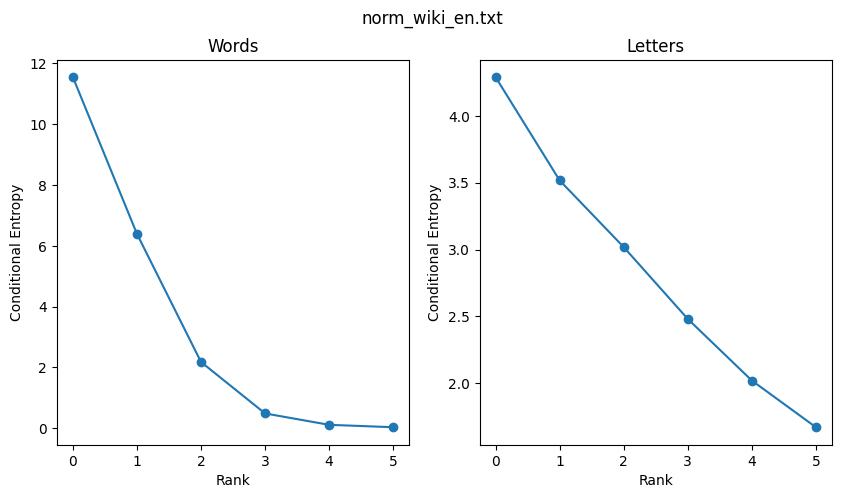

Rank            0        1        2         3         4          5
-------  --------  -------  -------  --------  --------  ---------
Words    11.544    6.38917  2.17646  0.484678  0.109652  0.0307703
Letters   4.28822  3.5166   3.01832  2.48157   2.02118   1.67241


In [14]:
lang_entropy('wiki/norm_wiki_en.txt', [0, 1, 2, 3, 4, 5])

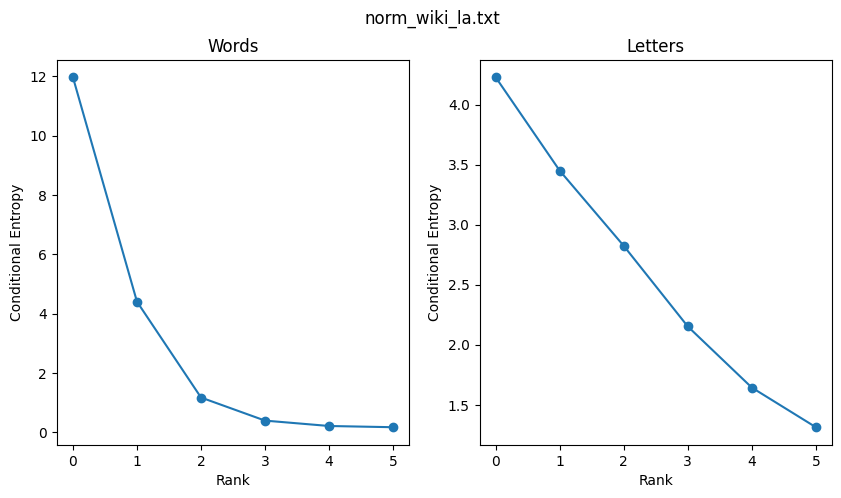

Rank            0        1        2         3         4         5
-------  --------  -------  -------  --------  --------  --------
Words    11.9692   4.40003  1.16689  0.388039  0.206473  0.165112
Letters   4.22825  3.45013  2.82349  2.15203   1.64276   1.31275


In [15]:
lang_entropy('wiki/norm_wiki_la.txt', [0, 1, 2, 3, 4, 5])

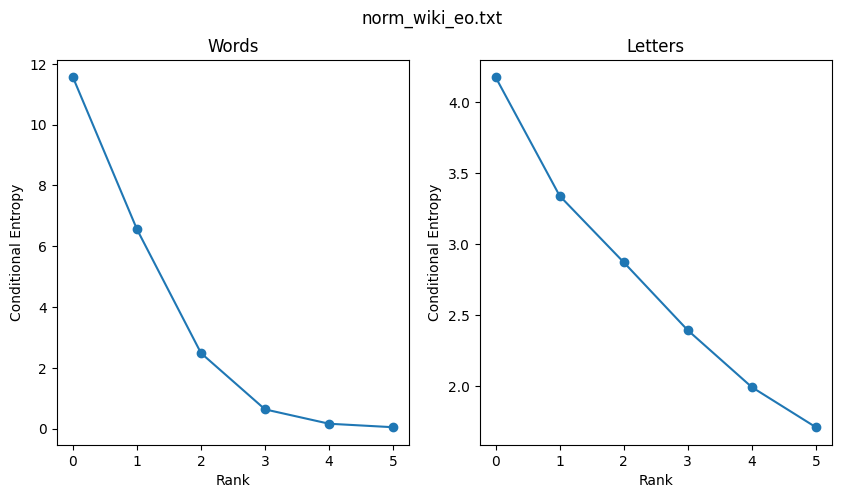

Rank            0        1        2         3         4          5
-------  --------  -------  -------  --------  --------  ---------
Words    11.5605   6.55768  2.48472  0.633618  0.161658  0.0469055
Letters   4.17679  3.34001  2.87183  2.39262   1.99151   1.70902


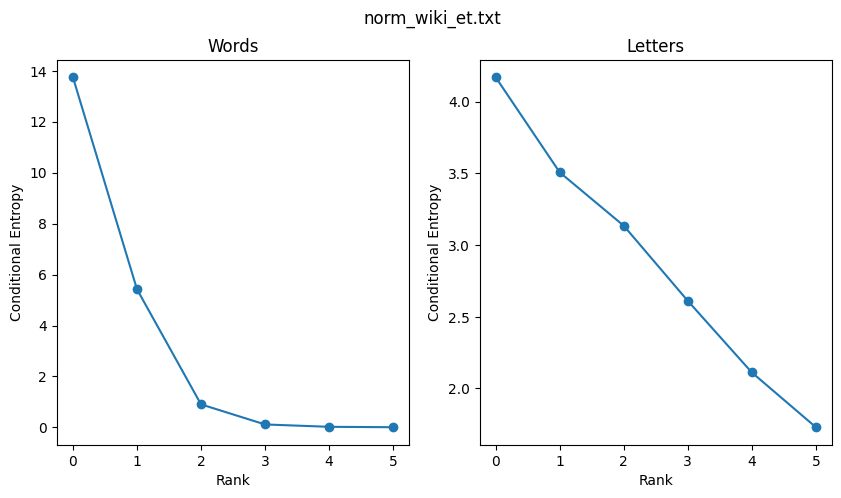

Rank            0        1         2         3          4           5
-------  --------  -------  --------  --------  ---------  ----------
Words    13.7462   5.42419  0.904739  0.116196  0.0236461  0.00750881
Letters   4.16983  3.50696  3.13441   2.61087   2.11144    1.72972


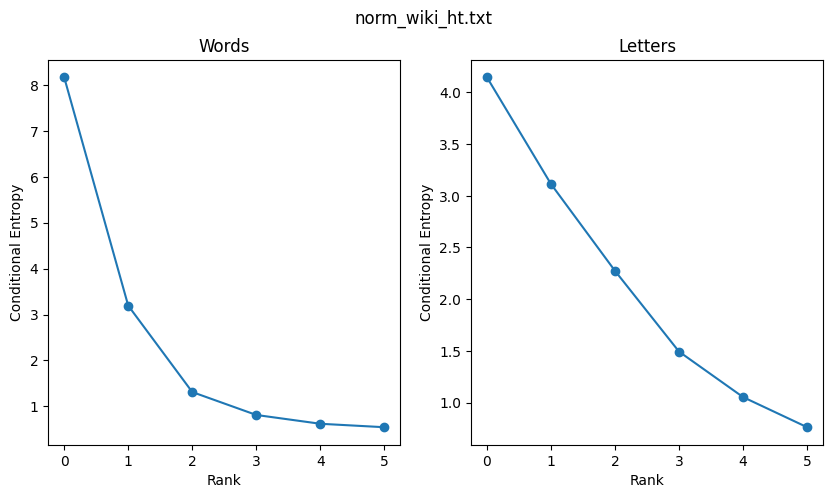

Rank           0        1        2         3         4         5
-------  -------  -------  -------  --------  --------  --------
Words    8.16692  3.19312  1.31133  0.812232  0.620578  0.545413
Letters  4.14639  3.11386  2.27353  1.49215   1.05214   0.760936


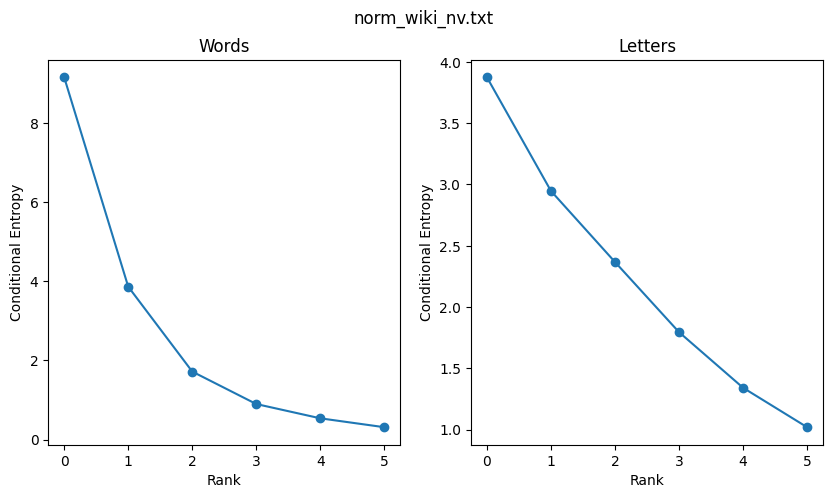

Rank           0        1        2         3         4         5
-------  -------  -------  -------  --------  --------  --------
Words    9.15401  3.86393  1.71881  0.899245  0.538567  0.313845
Letters  3.87494  2.94727  2.36758  1.79526   1.3416    1.01985


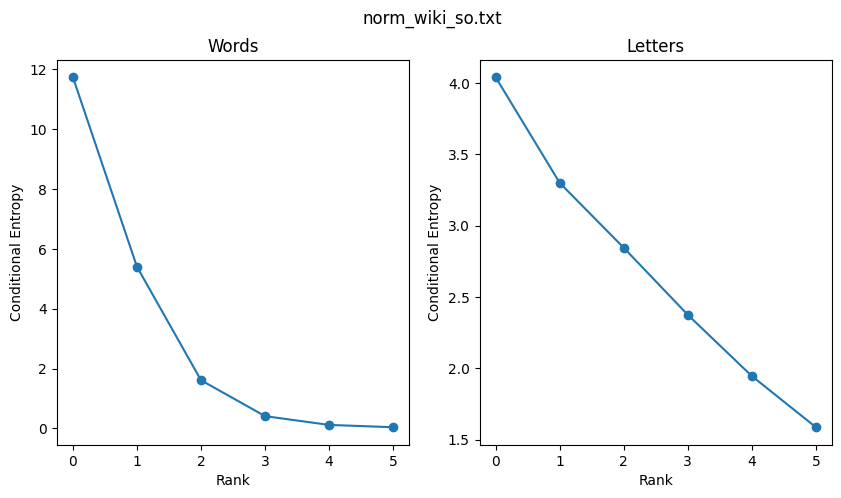

Rank            0        1        2         3         4          5
-------  --------  -------  -------  --------  --------  ---------
Words    11.7311   5.39873  1.60862  0.409604  0.116609  0.0395044
Letters   4.04011  3.29957  2.84437  2.37431   1.94503   1.58627


In [16]:
languages  = ['eo', 'et', 'ht', 'nv', 'so']

for lang in languages:
    lang_entropy(f'wiki/norm_wiki_{lang}.txt', list(range(0, 6)))

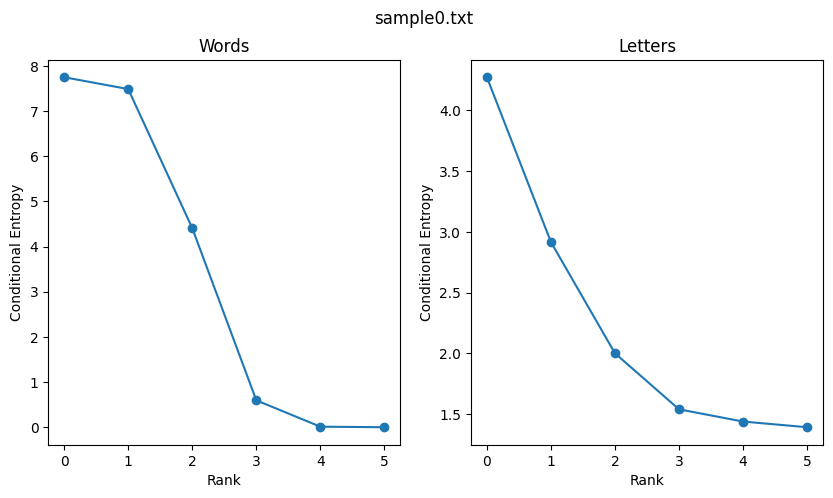

Rank           0        1        2         3         4            5
-------  -------  -------  -------  --------  --------  -----------
Words    7.74874  7.48639  4.4067   0.595008  0.012061  9.99564e-05
Letters  4.273    2.91589  2.00036  1.53928   1.43858   1.39197


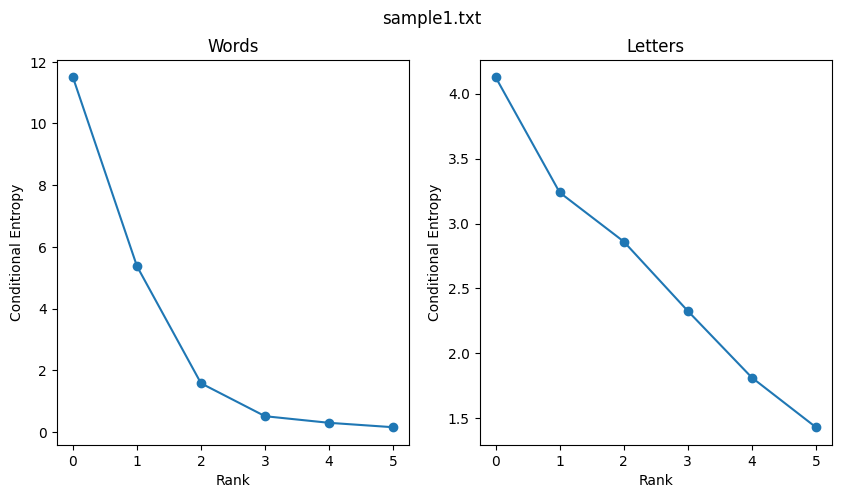

Rank            0        1        2         3         4         5
-------  --------  -------  -------  --------  --------  --------
Words    11.5007   5.37224  1.57474  0.507509  0.293456  0.150563
Letters   4.12701  3.23915  2.86128  2.32668   1.81351   1.43112


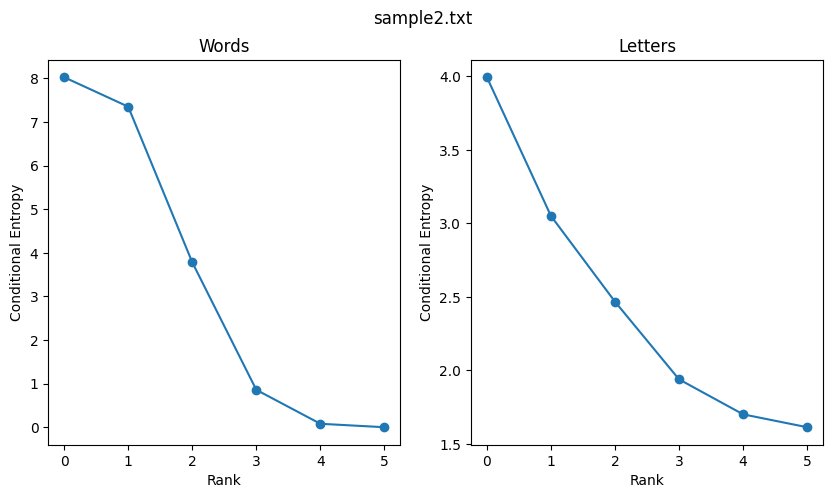

Rank           0        1        2         3          4           5
-------  -------  -------  -------  --------  ---------  ----------
Words    8.02387  7.34862  3.78193  0.859505  0.0819899  0.00298573
Letters  3.99331  3.05044  2.46766  1.93977   1.70203    1.61441


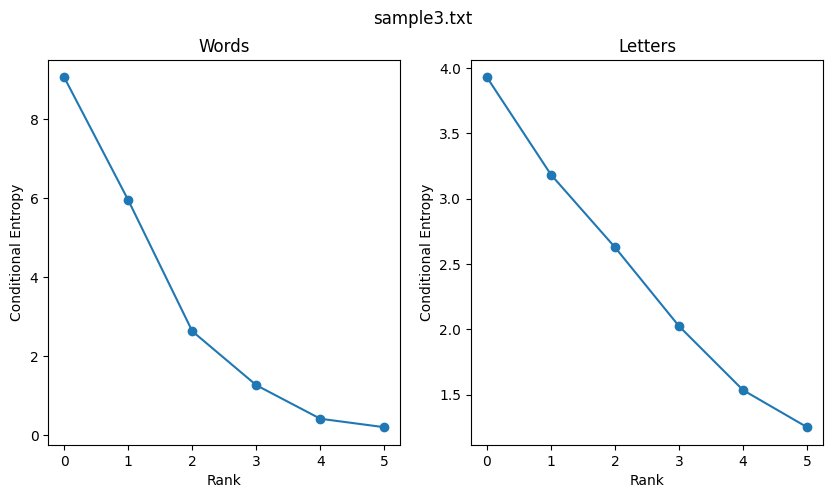

Rank           0        1       2        3         4         5
-------  -------  -------  ------  -------  --------  --------
Words    9.06111  5.95022  2.6308  1.26409  0.414325  0.200121
Letters  3.9303   3.18447  2.6279  2.02399  1.53424   1.25041


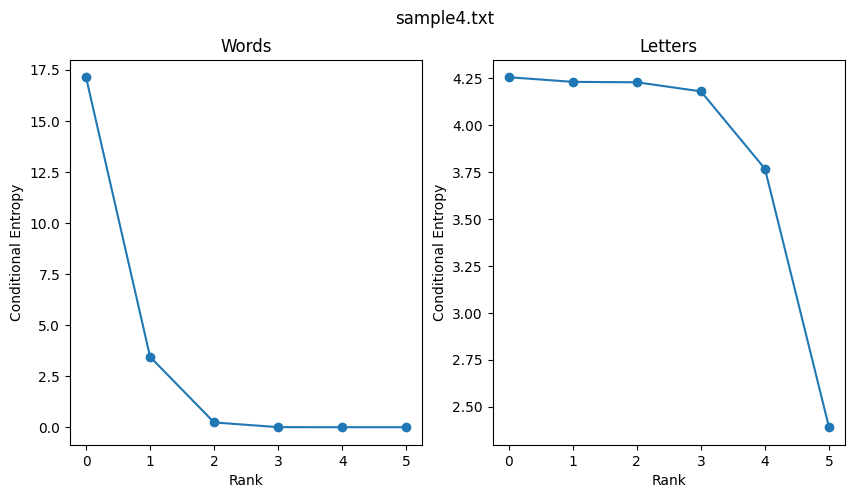

Rank            0        1         2           3            4             5
-------  --------  -------  --------  ----------  -----------  ------------
Words    17.1297   3.44425  0.234075  0.00322664  6.82477e-06  -7.82932e-07
Letters   4.25381  4.2291   4.22683   4.17854     3.76613       2.39057


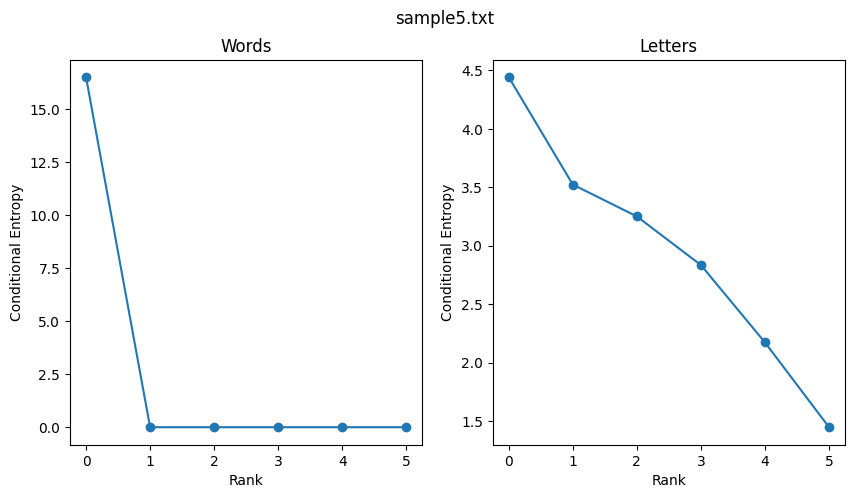

Rank            0             1             2             3             4             5
-------  --------  ------------  ------------  ------------  ------------  ------------
Words    16.5095   -3.08608e-08  -3.08573e-08  -3.08712e-08  -3.08691e-08  -3.08026e-08
Letters   4.44169   3.5231        3.25062       2.83427       2.17244       1.44687


In [17]:
for sample in range(0, 6):
    lang_entropy(f'samples/sample{sample}.txt', list(range(0, 6)))

#  Odpowiedź:

* sample0 - **NIE** - zbyt mała różnica między entropią warunkową rzędu 0, a 1 
* sample1 - **TAK** - entropia warunkowa maleję z każdym rzędem. Wykres podobny do wykresu języków naturalnych wyżej
* sample2 - **NIE** - tak samo jak w przypadku sample0
* sample3 - **TAK** - entropia warunkowa maleję z każdym rzędem. Wykres podobny do wykresu języków naturalnych wyżej
* sample4 - **NIE(?)** - w przypadku języków naturalnych dla liter wykres jest praktycznie liniowy, natomiast tutaj między 0, a 4 entropia warunkowa jest praktycznie taka sama i maleję dopiero w rzędzie 5
* sample5 - **NIE** - entropia warunkowa wyrazu zbyt szybko maleję przy 1 rzędzie, a potem pozostaje stała